In [1]:
from helpers import *
from tqdm import notebook

In [2]:
df = pd.read_csv("data/eil51.tsp.txt", skiprows=6, names=["id", "x", "y"], header=None, delimiter = ' ', index_col=0).drop("EOF")

<AxesSubplot:xlabel='x', ylabel='y'>

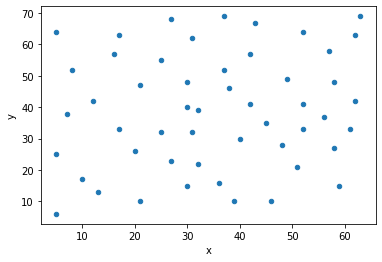

In [3]:
df.plot.scatter("x", "y")

In [6]:
sim = AnnealTVS(df, K = 10, stopK = 0.000001, alpha = 0.95, elementary="swap")

In [7]:
sim.total_distance()

566.6690321492305

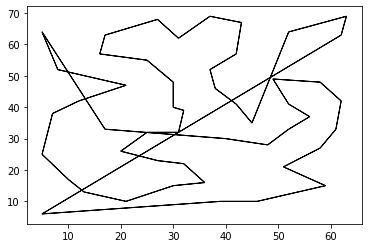

In [8]:
sim.plot_solution()

In [9]:
res = sim.run_sim()

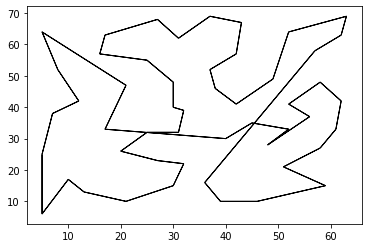

In [10]:
sim.plot_solution()

In [11]:
sim.total_distance()

512.9026032292061

In [4]:
def runsims():
    sim = AnnealTVS(df, K = 10, stopK = 0.000001, alpha = 0.95, elementary="swap")
    res = sim.run_sim()
    return res

In [5]:
num_sims = 10
results_sims= Parallel(n_jobs=8)(delayed(runsims)()
                                      for i in range(num_sims))

In [18]:
results_sims[9][8]

(['6',
  '12',
  '46',
  '51',
  '27',
  '1',
  '32',
  '11',
  '38',
  '5',
  '49',
  '9',
  '50',
  '16',
  '2',
  '29',
  '21',
  '34',
  '30',
  '10',
  '39',
  '33',
  '45',
  '15',
  '44',
  '37',
  '17',
  '4',
  '18',
  '14',
  '25',
  '13',
  '41',
  '40',
  '19',
  '42',
  '47',
  '48',
  '8',
  '26',
  '31',
  '28',
  '3',
  '36',
  '35',
  '20',
  '22',
  '7',
  '23',
  '24',
  '43'],
 [492.15586447446003])